# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries + dataset** 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor

In [2]:
df = pd.read_csv('./data/acetylcholinesterase_bioactivity_3class_pubchem_fp.csv')

## **2. Features**
### **2.1. Features**
The ***Acetylcholinesterase*** data set contains 881 input features (Pubchem fingerprints) and 1 output variable (pIC50 values).

In [3]:
# for X (features), only want fingerprints
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8123,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8124,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **2.2. Target**

In [4]:
# for Y (target), want pIC50
Y = df.pIC50
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
8122   4.34
8123   4.42
8124   5.77
8125   5.00
8126   5.00
Name: pIC50, Length: 8127, dtype: float64

In [5]:
X.shape

(8127, 881)

In [6]:
Y.shape

(8127,)

### **2.3. Remove low variance features**

Currently shows 881 fp columns; those with low variance are likely not useful as predictors, so we will remove the low variance columns with a threshold of 10% variance.

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=.1) 
X = selection.fit_transform(X)

In [8]:
X.shape
# greatly reduced number of fp columns

(8127, 213)

## **3. Split Test-Train Data (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# verify dimensions 
X_train.shape, Y_train.shape

((6501, 213), (6501,))

In [11]:
X_test.shape, Y_test.shape

((1626, 213), (1626,))

## **4. Building MLs**
### LazyClassifier to compare multiple ML models

In [14]:
! pip install ipywidgets
! pip install --upgrade jupyter jupyterlab ipywidgets

  Using cached jupyterlab-4.4.7-py3-none-any.whl.metadata (16 kB)


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [ ]:
# building 42 models with default parameters
lazy_regs = LazyRegressor(ignore_warnings=True, verbose=0)
lz_model, lz_predict = lazy_regs.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

c:\Users\liv_u\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5514069652899707, tolerance: 1.325676528850481
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\liv_u\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5130580050372373, tolerance: 1.325676528850481
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\liv_u\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8440707272275176, tolerance: 1.325676528850481
  model = cd_fast.enet_coordinate_descent_gram(
c

In [17]:
lz_model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.65,0.70,0.82,52.85
XGBRegressor,0.64,0.68,0.84,1.19
BaggingRegressor,0.63,0.67,0.85,5.65
LGBMRegressor,0.61,0.66,0.87,0.83
HistGradientBoostingRegressor,0.60,0.65,0.88,3.64
MLPRegressor,0.58,0.64,0.90,24.48
SVR,0.57,0.63,0.91,23.22
NuSVR,0.57,0.62,0.92,18.29
KNeighborsRegressor,0.55,0.61,0.94,0.57


In [ ]:
lz_predict

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.65,0.70,0.82,52.85
XGBRegressor,0.64,0.68,0.84,1.19
BaggingRegressor,0.63,0.67,0.85,5.65
LGBMRegressor,0.61,0.66,0.87,0.83
HistGradientBoostingRegressor,0.60,0.65,0.88,3.64
MLPRegressor,0.58,0.64,0.90,24.48
SVR,0.57,0.63,0.91,23.22
NuSVR,0.57,0.62,0.92,18.29
KNeighborsRegressor,0.55,0.61,0.94,0.57


### Top Model: Random Forest Regression 

In [26]:
import numpy as np
np.random.seed(22)

# instantiate, fit, predict
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2_RForest = model.score(X_test, Y_test)
r2_RForest

0.7008975485820521

In [27]:
Y_pred = model.predict(X_test)

## **5. Scatter Plot of Random Forest Regressor**

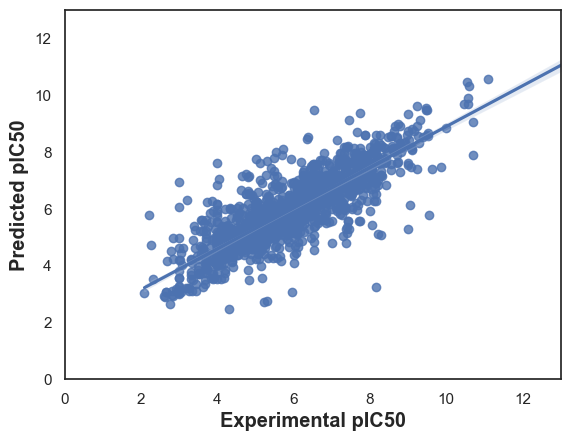

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.savefig('regression_model_scatter_plot.pdf')
plt.show()